In [6]:
#https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

In [7]:
# Install Libraries
!pip install textblob
!pip install tweepy


In [8]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# Authentication
consumerKey = "qI4nOPZl0BBWdy7hiDMOCsTwF"
consumerSecret = "GJJZ1NNGJ3NrujukxNmjqsCRGQ5ANBUKf0RzwtCl8IUzc2SLbZ"
accessToken = "1277486040526315520-6Gw2AhYoM4HfcN7SZD2bpGQxKyPWRz"
accessTokenSecret = "NPSzAUasBO4Fs0vFjmDKvaDDR955zuaClaPiq80XdJ8Y9"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [10]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
api = tweepy.API(auth, wait_on_rate_limit=True)

Please enter keyword or hashtag to search: AAPL
Please enter how many tweets to analyze: 600


In [11]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  600
positive number:  231
negative number:  60
neutral number:  309


In [12]:
tweet_list


,0
0,RT @gregjoz: Unleashed! These next six days ar...
1,RT @abd_almuhanna: ماذا يعني إستثمار 1000 دولا...
2,RT @MarketRebels: Most Traded Contracts\n\n$ED...
3,Entry on $AAPL at the 142.20 level up $6 per c...
4,$AAPL can still see more downside towards $132...
...,...
595,RT @OffersForex: Automatic Mining System Extra...
596,RT @CorruptCounties: @MarkQuarter @CannaJourna...
597,@MarkQuarter @CannaJournalist @WhiteHouse @POT...
598,"Always keep hedges, specially in days like tho..."


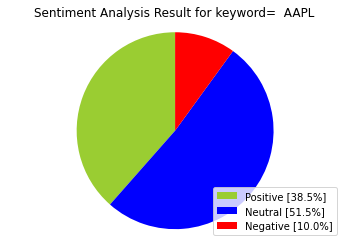

In [13]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [14]:
tweet_list.drop_duplicates(inplace = True)


In [15]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @gregjoz: Unleashed! These next six days ar...,RT @gregjoz: Unleashed! These next six days ar...
1,RT @abd_almuhanna: ماذا يعني إستثمار 1000 دولا...,RT @abd_almuhanna: ماذا يعني إستثمار 1000 دولا...
2,RT @MarketRebels: Most Traded Contracts\n\n$ED...,RT @MarketRebels: Most Traded Contracts\n\n$ED...
3,Entry on $AAPL at the 142.20 level up $6 per c...,Entry on $AAPL at the 142.20 level up $6 per c...
4,$AAPL can still see more downside towards $132...,$AAPL can still see more downside towards $132...
...,...,...
595,RT @OffersForex: Automatic Mining System Extra...,RT @OffersForex: Automatic Mining System Extra...
596,RT @CorruptCounties: @MarkQuarter @CannaJourna...,RT @CorruptCounties: @MarkQuarter @CannaJourna...
597,@MarkQuarter @CannaJournalist @WhiteHouse @POT...,@MarkQuarter @CannaJournalist @WhiteHouse @POT...
598,"Always keep hedges, specially in days like tho...","Always keep hedges, specially in days like tho..."


In [16]:
tweet_list

,0,text
0,RT @gregjoz: Unleashed! These next six days ar...,RT @gregjoz: Unleashed! These next six days ar...
1,RT @abd_almuhanna: ماذا يعني إستثمار 1000 دولا...,RT @abd_almuhanna: ماذا يعني إستثمار 1000 دولا...
2,RT @MarketRebels: Most Traded Contracts\n\n$ED...,RT @MarketRebels: Most Traded Contracts\n\n$ED...
3,Entry on $AAPL at the 142.20 level up $6 per c...,Entry on $AAPL at the 142.20 level up $6 per c...
4,$AAPL can still see more downside towards $132...,$AAPL can still see more downside towards $132...
...,...,...
595,RT @OffersForex: Automatic Mining System Extra...,RT @OffersForex: Automatic Mining System Extra...
596,RT @CorruptCounties: @MarkQuarter @CannaJourna...,RT @CorruptCounties: @MarkQuarter @CannaJourna...
597,@MarkQuarter @CannaJournalist @WhiteHouse @POT...,@MarkQuarter @CannaJournalist @WhiteHouse @POT...
598,"Always keep hedges, specially in days like tho...","Always keep hedges, specially in days like tho..."


In [17]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @gregjoz: Unleashed! These next six days ar...,unleashed these next six days are going to s...
1,RT @abd_almuhanna: ماذا يعني إستثمار 1000 دولا...,1000 spy ...
2,RT @MarketRebels: Most Traded Contracts\n\n$ED...,most traded contracts edu november 3 call ...
3,Entry on $AAPL at the 142.20 level up $6 per c...,entry on aapl at the 142 20 level up 6 per c...
4,$AAPL can still see more downside towards $132...,aapl can still see more downside towards 132...
5,"BANK EARNINGS PREVIEW, JPM, MS, GS Stock - Sto...",bank earnings preview jpm ms gs stock sto...
6,Remember peeps $MSFT bought $LNKD when no-one ...,remember peeps msft bought lnkd when no one ...
7,RT @Jake25754144: $WTII IF YOU DON'T SEE THE S...,wtii if you don t see the signs you will so...
8,🟢 $evgo 🟢\n$lcid $clov $msft $aapl $tsla $fsr ...,evgo lcid clov msft aapl tsla fsr ...
10,🟢 $evgo 🟢\n$lcid $clov $msft $aapl $tsla $fsr ...,evgo lcid clov msft aapl tsla fsr ...


In [18]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @gregjoz: Unleashed! These next six days ar...,unleashed these next six days are going to s...,0.0,0.000,neutral,0.000,1.000,0.0,0.0000
1,RT @abd_almuhanna: ماذا يعني إستثمار 1000 دولا...,1000 spy ...,0.0,0.000,neutral,0.000,1.000,0.0,0.0000
2,RT @MarketRebels: Most Traded Contracts\n\n$ED...,most traded contracts edu november 3 call ...,0.5,0.500,neutral,0.000,1.000,0.0,0.0000
3,Entry on $AAPL at the 142.20 level up $6 per c...,entry on aapl at the 142 20 level up 6 per c...,0.1,1.000,neutral,0.000,1.000,0.0,0.0000
4,$AAPL can still see more downside towards $132...,aapl can still see more downside towards 132...,0.5,0.500,negative,0.294,0.706,0.0,-0.7264
5,"BANK EARNINGS PREVIEW, JPM, MS, GS Stock - Sto...",bank earnings preview jpm ms gs stock sto...,0.0,0.000,neutral,0.000,1.000,0.0,0.0000
6,Remember peeps $MSFT bought $LNKD when no-one ...,remember peeps msft bought lnkd when no one ...,0.0,0.125,negative,0.104,0.896,0.0,-0.2960
7,RT @Jake25754144: $WTII IF YOU DON'T SEE THE S...,wtii if you don t see the signs you will so...,0.0,0.000,neutral,0.000,1.000,0.0,0.0000
8,🟢 $evgo 🟢\n$lcid $clov $msft $aapl $tsla $fsr ...,evgo lcid clov msft aapl tsla fsr ...,0.0,0.000,neutral,0.000,1.000,0.0,0.0000
10,🟢 $evgo 🟢\n$lcid $clov $msft $aapl $tsla $fsr ...,evgo lcid clov msft aapl tsla fsr ...,0.0,0.000,neutral,0.000,1.000,0.0,0.0000


In [19]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [20]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [21]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,244,44.28
positive,234,42.47
negative,73,13.25


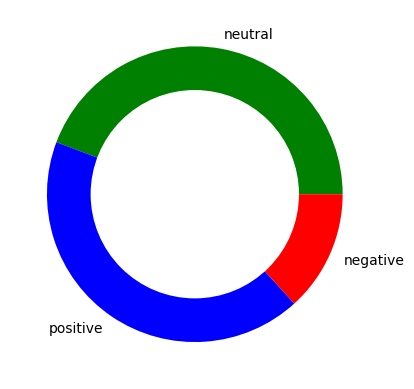

In [22]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [26]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [27]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)


,text_len
sentiment,
negative,96.07
neutral,88.80
positive,107.79


In [28]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)


,text_word_count
sentiment,
negative,17.36
neutral,14.63
positive,18.79


In [29]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [30]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [31]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [32]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [33]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [34]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @gregjoz: Unleashed! These next six days ar...,unleashed these next six days are going to s...,0.0,0.0,neutral,0.000,1.000,0.0,0.0000,68,11,unleashed these next six days are going to s...,"[, unleashed, these, next, six, days, are, goi...","[, unleashed, next, six, days, going, speed, a...","[, unleash, next, six, day, go, speed, appleev, ]"
1,RT @abd_almuhanna: ماذا يعني إستثمار 1000 دولا...,1000 spy ...,0.0,0.0,neutral,0.000,1.000,0.0,0.0000,122,7,spy ...,"[, spy, aapl, msft, ]","[, spy, aapl, msft, ]","[, spi, aapl, msft, ]"
2,RT @MarketRebels: Most Traded Contracts\n\n$ED...,most traded contracts edu november 3 call ...,0.5,0.5,neutral,0.000,1.000,0.0,0.0000,123,21,most traded contracts edu november call ...,"[, most, traded, contracts, edu, november, cal...","[, traded, contracts, edu, november, call, sof...","[, trade, contract, edu, novemb, call, sofi, o..."
3,Entry on $AAPL at the 142.20 level up $6 per c...,entry on aapl at the 142 20 level up 6 per c...,0.1,1.0,neutral,0.000,1.000,0.0,0.0000,61,14,entry on aapl at the level up per contrac...,"[entry, on, aapl, at, the, level, up, per, con...","[entry, aapl, level, per, contract, far, ]","[entri, aapl, level, per, contract, far, ]"
4,$AAPL can still see more downside towards $132...,aapl can still see more downside towards 132...,0.5,0.5,negative,0.294,0.706,0.0,-0.7264,126,20,aapl can still see more downside towards ...,"[, aapl, can, still, see, more, downside, towa...","[, aapl, still, see, downside, towards, area, ...","[, aapl, still, see, downsid, toward, area, lo..."


In [35]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

551 Number of reviews has 1532 words


In [36]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aal,aap,aapl,aapt,abbv,abev,abnb,abt,acb,...,yeti,yield,ym,yndx,z,zec,zil,zm,znga,zone
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
aapl,376
tsla,139
fb,120
spi,85
amzn,79
msft,79
stock,76
trade,67
amd,58
blnk,54


In [38]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [39]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('aapl tsla', 45),
 ('msft aapl', 32),
 ('nflx fb', 29),
 ('fb ba', 29),
 ('evgo lcid', 27),
 ('lcid clov', 27),
 ('clov msft', 27),
 ('tsla fsr', 27),
 ('fsr chpt', 27),
 ('chpt blnk', 27),
 ('blnk amc', 27),
 ('amc amd', 27),
 ('amd gme', 27),
 ('gme bb', 27),
 ('bb fubo', 27),
 ('fubo hood', 27),
 ('hood nio', 27),
 ('nio nflx', 27),
 ('ba blnk', 27),
 ('ticker price', 19)]

In [40]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('evgo lcid clov', 27),
 ('lcid clov msft', 27),
 ('clov msft aapl', 27),
 ('msft aapl tsla', 27),
 ('aapl tsla fsr', 27),
 ('tsla fsr chpt', 27),
 ('fsr chpt blnk', 27),
 ('chpt blnk amc', 27),
 ('blnk amc amd', 27),
 ('amc amd gme', 27),
 ('amd gme bb', 27),
 ('gme bb fubo', 27),
 ('bb fubo hood', 27),
 ('fubo hood nio', 27),
 ('hood nio nflx', 27),
 ('nio nflx fb', 27),
 ('nflx fb ba', 27),
 ('fb ba blnk', 27),
 ('ticker price change', 19),
 ('price change change', 19)]

In [41]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [45]:
AAPL = yf.download("AAPL", start="2021-10-11", end="2021-10-12", interval = "1h")
AAPL

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-10-11 09:30:00-04:00,142.270004,144.809998,141.809998,144.701096,144.701096,17448315
2021-10-11 10:30:00-04:00,144.710007,144.749893,144.190002,144.449997,144.449997,12153519
2021-10-11 11:30:00-04:00,144.440002,144.649994,144.000000,144.095001,144.095001,5997421
2021-10-11 12:30:00-04:00,144.080002,144.119995,143.479996,143.550003,143.550003,5945488
2021-10-11 13:30:00-04:00,143.554993,143.839996,143.380005,143.600006,143.600006,5059315
2021-10-11 14:30:00-04:00,143.600006,143.669998,143.130005,143.179993,143.179993,5467707
2021-10-11 15:30:00-04:00,143.169998,143.279999,142.750000,142.800003,142.800003,5580504


<AxesSubplot:>

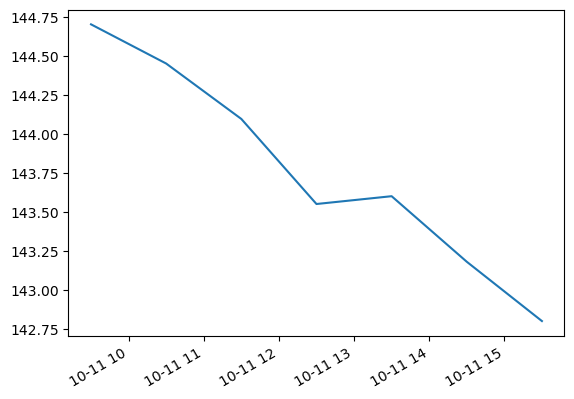

In [46]:
AAPL['Adj Close'].plot()

In [47]:
tw_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                551 non-null    object 
 1   text             551 non-null    object 
 2   polarity         551 non-null    float64
 3   subjectivity     551 non-null    float64
 4   sentiment        551 non-null    object 
 5   neg              551 non-null    float64
 6   neu              551 non-null    float64
 7   pos              551 non-null    float64
 8   compound         551 non-null    float64
 9   text_len         551 non-null    int64  
 10  text_word_count  551 non-null    int64  
 11  punct            551 non-null    object 
 12  tokenized        551 non-null    object 
 13  nonstop          551 non-null    object 
 14  stemmed          551 non-null    object 
dtypes: float64(6), int64(2), object(7)
memory usage: 85.0+ KB
